In [15]:
import Pkg; Pkg.update()


    Updating registry at `C:\Users\spade\.julia\registries\General.toml`
   Installed GR_jll ────────────── v0.72.9+1
   Installed OpenSSL ───────────── v1.4.1
   Installed RelocatableFolders ── v1.0.0
   Installed ConcurrentUtilities ─ v2.2.1
   Installed Unitful ───────────── v1.17.0
   Installed RecipesPipeline ───── v0.6.12
   Installed Contour ───────────── v0.6.2
   Installed Pipe ──────────────── v1.3.0
   Installed HTTP ──────────────── v1.9.15
   Installed SimpleBufferStream ── v1.1.0
   Installed XZ_jll ────────────── v5.4.4+0
   Installed PlotThemes ────────── v3.1.0
   Installed LoggingExtras ─────── v1.0.2
   Installed TranscodingStreams ── v0.9.13
   Installed fzf_jll ───────────── v0.29.0+0
   Installed JLFzf ─────────────── v0.1.5
   Installed UnicodeFun ────────── v0.4.1
   Installed CodecZlib ─────────── v0.7.2
   Installed ExceptionUnwrapping ─ v0.1.9
   Installed NaNMath ───────────── v1.0.2
   Installed StatsPlots ────────── v0.15.6
   Installed Libtiff_jll ───────

In [1]:
# Sums the 8 neighboring cells for each game cell
function sumNeighbors(gameBoard, sumBoard)
    n = size(sumBoard, 1) - 2
    for r in 2:n + 1
        for c in 2:n + 1
            sumBoard[r, c] = gameBoard[r - 1, c - 1] + gameBoard[r - 1, c] + gameBoard[r - 1, c + 1] + 
                             gameBoard[r, c - 1]              +              gameBoard[r, c + 1] + 
                             gameBoard[r + 1, c - 1] + gameBoard[r + 1, c] + gameBoard[r + 1, c + 1]
        end
    end
end

sumNeighbors (generic function with 1 method)

In [2]:
# Checks if a cell should live or die
function checkRules(gameBoard, sumBoard) 
    for r in 2:n + 1
        for c in 2:n + 1
            if gameBoard[r, c] == 1 && (sumBoard[r, c] < 2 || sumBoard[r, c] > 3)
                gameBoard[r, c] = 0
            elseif gameBoard[r, c] == 0 && sumBoard[r, c] == 3
                gameBoard[r, c] = 1
            end
        end
    end
end

checkRules (generic function with 1 method)

In [21]:
# --- Sets up game board and sum board ---
# - Size of playable area on Game Board
n = 100

# - Zeros out both boards -
sumBoard = zeros(Int64, n + 2, n + 2)
gameBoard = zeros(Int64, n + 2, n + 2)

# - Sets random life on game board -
gameBoard[2:n + 1, 2:n + 1] = rand((0, 1), n, n)

100×100 Matrix{Int64}:
 1  1  0  0  1  0  1  1  0  1  0  0  1  …  1  1  0  1  0  0  1  0  1  1  0  0
 0  1  1  1  1  0  0  1  1  1  1  0  1     1  1  1  1  1  0  0  0  1  1  1  0
 1  0  0  1  1  0  1  0  0  0  0  0  1     0  1  1  0  1  1  0  1  0  1  1  1
 1  0  0  1  1  1  0  1  1  0  0  0  0     1  0  0  0  0  1  1  1  1  0  1  0
 0  0  0  1  0  0  0  1  0  0  0  0  0     0  1  1  1  0  1  1  0  1  0  1  0
 1  0  0  0  1  0  1  1  0  1  0  0  1  …  0  0  1  1  1  1  0  1  0  1  1  0
 1  1  0  0  1  1  1  0  0  0  0  1  0     0  0  1  0  0  0  0  0  1  0  0  1
 0  1  0  1  1  0  0  0  1  0  0  0  1     0  0  1  0  0  1  0  1  0  1  1  0
 0  1  1  0  0  1  1  0  0  0  0  1  0     0  1  1  0  1  1  1  0  1  1  1  1
 1  0  0  0  0  0  1  0  0  1  0  0  0     0  0  1  1  0  0  0  0  0  0  1  0
 1  0  0  1  1  1  1  0  0  1  1  1  1  …  1  0  1  0  0  0  1  0  1  1  0  1
 1  1  1  0  1  1  1  0  0  1  0  1  1     0  1  0  0  1  0  1  0  1  0  0  0
 1  1  1  0  0  1  0  1  1  0  0  0  0   

[ Info: Saved animation to c:\Users\spade\Documents\GitHub\MA2600-ConwayGameOfLife\tmp.gif


Plots.AnimatedGif("c:\\Users\\spade\\Documents\\GitHub\\MA2600-ConwayGameOfLife\\tmp.gif")
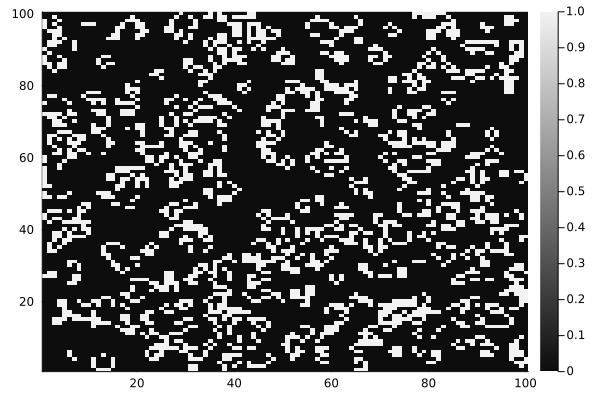

In [23]:
using Plots

# -- Loops the game --
anim = @animate for i in 1:100
   sumNeighbors(gameBoard, sumBoard)
   checkRules(gameBoard, sumBoard)

   # Show gameboard here
   heatmap(gameBoard[2:n + 1, 2:n + 1], c = :grays)
end

gif(anim, fps = 1)